In [103]:
import json
import pandas as pd
import re
import networkx as nx
import itertools
import matplotlib.pyplot as plt

In [80]:
df = pd.read_json('fits-users.json').T
df['likes'] = df['likes'].astype(int)
df['comments'] = df['comments'].astype(int)

In [90]:
df['fit_items'].loc[1500]

[['rick-owens', 'rivet-short-level-tanktop'],
 ['rick-owens-drkshdw', 'waxed-mem'],
 ['phi', 's-jeans'],
 ['rick-owens', 'cumsole-tractor-boots']]

In [87]:
brand_HTML = ''' <div data-v-7c637374="" class="list-container"><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">*A VONTADE</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">10sei0otto</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">11 By Boris Bidjan Saberi</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">18 East</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">1KCORP</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">3.1 Phillip Lim</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">3sixteen</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">45rpm</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">69</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">A Cold Wall</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">A Day's March</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">A Kind Of Guise</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">A.P.C.</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">A1923</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">AOKU</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">AS Colour</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Abasi Rosborough</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Acne Studios</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Acronym</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Adidas</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Adiev Paris</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Adsum</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Affix Works</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Aglini</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Agnes B.</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ahlem Eyewear</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Alden</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Aleksandr Manamis</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Alexander McQueen</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">All Saints</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Allen Edmonds</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Alpha Industries</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Alyx</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ambush Design</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ann Demeulemeester</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Arc'Teryx</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Arc'teryx Leaf</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Arc'teryx Veilance</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Aries</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Army Of Me</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Arpenteur</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Asics</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Atmos</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Attachment</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Avirex</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Bagjack</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Balenciaga</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Balibaris</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Balmain</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Balmung</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Band T Shirt</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Band Tees</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Bape</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Baracuta</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Bare Knuckles</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Baudoin &amp; Lange</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Beams Plus</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Beauty &amp; Youth</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Beauty Beast</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Bed J W Ford</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Bedwin &amp; The Heartbreakers</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Billionaire Boys Club</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Birkenstock</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Bjorn Borg</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Blackmeans</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Blends</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Bleu De Paname</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Blk Dnm</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Blue Blue Japan</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Blundstone</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">BonneGueule</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Boris Bidjan Saberi</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Brain Dead</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Brandblack</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Brooks Brothers</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Brutal Systems</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Buzz Rickson's</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">By Myself</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">By Walid</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">C. By Loredana Pinasco</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">C.P. Company</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">C2h4</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Cactus Plant Flea Market</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Calvin Klein</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Calvin Klein 205W39NYC</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Camper</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Carhartt</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Carhartt Wip</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Carol Christian Poell</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Carpe Diem</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Carrera</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Casio</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Caterpillar</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Cav Empt</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Celine</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Cell Aging *</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Champion</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Chamula</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Chapter</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Cheat Day</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Checks</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Chrome Hearts</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Clarks</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Cmmn Swdn</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Coevo</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Comme Des Garcons</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Comme Des Garcons Homme Plus</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Comme Des Garcons Play</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Common Projects</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Converse</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Cos</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Country Road</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Craig Green</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Crocs</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Custom</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Custom Made</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Custom Piece</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Cypress</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Deepti</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Descendant</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Descente</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Devoa</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Dickies</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Diemme</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Diesel</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Dior</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Dirk Bikkembergs</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Disney</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Dita</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Divinities</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Diy</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Doc Martens</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Dolce &amp; Gabbana</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Dover Street Market</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Dr. Martens</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Dries Van Noten</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Dsptch</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Dsquared2</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Eastlogue</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Eastpak</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ebbets Field Flannels</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ecco</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Edwin</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Effector</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Empyre</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">En Noir</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Enfin Leve</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Engineered Garments</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Epaulet</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Eric Bompard</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Etnia</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Eton</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ev Bravado</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Evan Kinori</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Evisu</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Eyevan 7285</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Eytys</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Fairends</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Faliero Sarti</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Fdmtl</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Fear of God</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Fila</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Filippa K</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Firmament Berlin Renaissance</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">First Aid To The Injured</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Folk</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Forty Percent Against Rights</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Four Horsemen</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Fragment Design</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Frank Leder</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">French Trotters</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Frye</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Fucking Awesome</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Futura</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">G Star Raw</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">G.H. Bass &amp; Co.</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Gap</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Garrett Leight</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Garrett Wilson</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Geek</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Geoffrey B. Small</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Gildan</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Girls Dont Cry</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Givenchy</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Good Art</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Goros</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Gosha Rubchinskiy</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Goyard</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Gramicci</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Greg Lauren</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Grenson</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Gucci</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Guerrilla Group</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Guess</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Guidi</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Gustin</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Haider Ackermann</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Hamcus</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Hanes</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Happy Socks</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Harley Davidson</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Haven</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Haven Shop</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Head Porter</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Helly Hansen</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Helmut  Lang</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Hender Scheme</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Heron Preston</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Hidden Characters</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Hoka One One</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Hood By Air</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Horisaki</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Human Made</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Hyein Seo</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Hysteric Glamour</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Idk</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Index</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ineffable</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Iron Heart</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Isaac Sellam Experience</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Isaora</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Isetan</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Issey Miyake</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">J.Crew</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">J.W.Anderson</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Jakob Hetzer</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Japan Blue</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Japanese</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Japanese Brand</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Jean Paul Gaultier</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">JieDa</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Jil Sander</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">John Deere</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">John Elliott</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">John Lofgren</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">John Mayer</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">John Varvatos</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Jordan</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Julius</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Junya Watanabe</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Juun.J</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Kapital</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Kapital Kountry</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Kazuyuki Kumagai Attachment</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Kenzo</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Kestin Hare</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Kijima Takayuki</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Kiko Kostadinov</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Klattermusen</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Knickerbocker Mfg Co</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Kris Van Assche</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ksubi</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Kuboraum</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">L.L. Bean</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">LVC</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Label Under Construction</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Lad Musician</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Larry Smith</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Leather Jacket</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Lee</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Lego</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Lemaire</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Leon Emanuel Blanck</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Levi's</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Levi's Made &amp; Crafted</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Levi's Vintage Clothing</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Liam Hodges</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Linda Farrow</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Lost &amp; Found Ria Dunn</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Louis Vuitton</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Luke Vicious</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Lululemon</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Luxire</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">M.A.D.mfg</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">MMW</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ma+</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Mackintosh</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Magic Stick Tokyo</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Maharishi</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Maison Margiela</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Makayla Wray</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Malibu Sandals</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Mango</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Marc Le Bihan</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Matsuda</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Max Mara</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Midnight Studios</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Miharayasuhiro</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Military</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Milsurp</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Minoar</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Minotaur</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Misbhv</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Mission Workshop</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Miu Miu</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Mki Miyuki-Zoku</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Moncler</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Monitaly</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Monoprix</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Montbell</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Moohong</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Moschino</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Mountain Research</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Muji</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Naked &amp; Famous</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Nanamica</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Napa By Martine Rose</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Needles</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Neighborhood</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Neil Barrett</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Nemen</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Nepenthes</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">New Balance</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">New Era</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">New Rock</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Nexus Vii</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Nigel Cabourn</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Nike</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Nike ACG</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Nissin</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Nitraid</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Nn07</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">No Brand</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">No Label</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Noah</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Nom De Guerre</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Nonnative</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Norse Projects</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Norwegian Rain</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Number (N)ine</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Oak + Fort</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Oakley</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Off-White</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Officine Creative</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Online Ceramics</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Opening Ceremony</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Orbit Gear</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Orslow</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Other</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Our Legacy</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Outdoor Voices</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Outlier</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ovate</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Overcast</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Pal Zileri</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Palace</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Palladium</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Panerai</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Paraboot</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Parts Of Four</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Patagonia</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Paul &amp; Shark</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Paul Smith</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Phenomenon</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Pierre Hardy</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Places + Faces</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Pleasures</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Polo Ralph Lauren</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Porter</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Post Archive Faction</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Prada</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">President's</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Prps</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Pyer Moss</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">R.M. Williams</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">ROA</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Raf Simons</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ralph Lauren</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ransom Holding Co.</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Rats</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ray­Ban</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Reebok</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Reigning Champ</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Reo Ma</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Represent Clo.</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Retrosuperfuture</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Revenge X Storm</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Rick Owens</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Rick Owens Drkshdw</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Rimowa</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Riot Division</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Rip Van Winkle Japan</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Rolex</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Rosen</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Rothco</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Rough &amp; Tumble</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">S.K. Manor Hill</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Sacai</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Saint Laurent Paris</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Salomon</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Salvatore Ferragamo</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Samurai Jeans</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Sasquatchfabrix</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Sassafras</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Satisfy</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Schott</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Sebago</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Seiko</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Self Edge</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Siki Im</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Sillage</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Sisley</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Skechers</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Skoloct</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Snow Peak</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Song For The Mute</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Sonic Lab</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Sophnet.</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Soso</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Soulive</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Spalwart</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Spring Court</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Stampd</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Stan Ray</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Stella Mccartney</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Stephan Schneider</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Sterling Ruby</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Stone Island</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Stone Island Shadow Project</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Story Et Fall</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Story Mfg.</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Stussy</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Suicoke</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Suit</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Sun Buddies</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Sun Surf</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Supreme</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Swrve</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Takahiromiyashita The Soloist.</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Takeo Kikuchi</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Target Basics</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Taro Washimi</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Telfar</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ten C</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Tenderloin</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">The Bureau Belfast</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">The Kooples</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">The Last Conspiracy</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">The North Face</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">The Unbranded Brand</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">The Viridi-anne</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Thom Browne</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Thom Krom</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Thrift</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Thrifted</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Timberland</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Tired Lab</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Tokugen</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Tom Sachs</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Travis Scott</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Trove</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Umbro</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Under Armour</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Undercover</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Uniqlo</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">United Arrows</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Universal Works</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Unravel Project</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Unused</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Urban Outfitters</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Valstar</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Van</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Vans</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Vanson Leathers</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Veja</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Velva Sheen</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Veronique Branquinho</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Versace</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Vetements</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Vetra</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Vexed Generation</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Vibe</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Vince</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Vintage</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Viridi Anne</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Visvim</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Vivienne Westwood</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Vlone</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Wacko Maria</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Walter Van Beirendonck</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Werkstatt Munchen</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">White Mountaineering</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Whoisjacov</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Wings + Horns</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Wood Wood</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Wrangler</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Wtaps</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Y-3</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Y/Project</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Yaeca</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Yang Li</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Yeezy Boost</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Yeezy Season</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Yohji Yamamoto</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ys For Men</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Ysl Pour Homme</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Yuketen</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Yves Saint Laurent</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Zam Barrett</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Zara</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">Zeptepi</span></div></div><div data-v-7c637374=""><div data-v-7c637374=""><svg data-v-f6e8aeec="" data-v-7c637374="" xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 32 32" aria-labelledby="box" role="presentation"><g data-v-f6e8aeec="" fill="currentColor"><!----> <g data-v-7c637374="" data-v-f6e8aeec=""><path d="M 5 5 L 5 27 L 27 27 L 27 5 Z M 7 7 L 25 7 L 25 25 L 7 25 Z "></path></g></g></svg> <span data-v-7c637374="" class="l-name">phi.</span></div></div></div>'''
brand_names = re.findall(r'"l-name">(.*?)<',brand_HTML)
brand_names_us=[name.lower().replace(' ','-') for name in brand_names]

In [137]:
def get_brand_connections(fit):
    brand_list = []
    for item in fit:
        if type(item[0])==list:
            brand_list.append(item[0][0])
        else:
            brand_list.append(item[0])
    brand_connect = [i for i in itertools.combinations(brand_list,2)]
    return itertools.combinations(brand_list,2)

In [139]:
Brand_Chart = nx.MultiGraph()
for item in df['fit_items'][df['fit_items'].str.len() != 0]:
    Brand_Chart.add_edges_from(get_brand_connections(item))

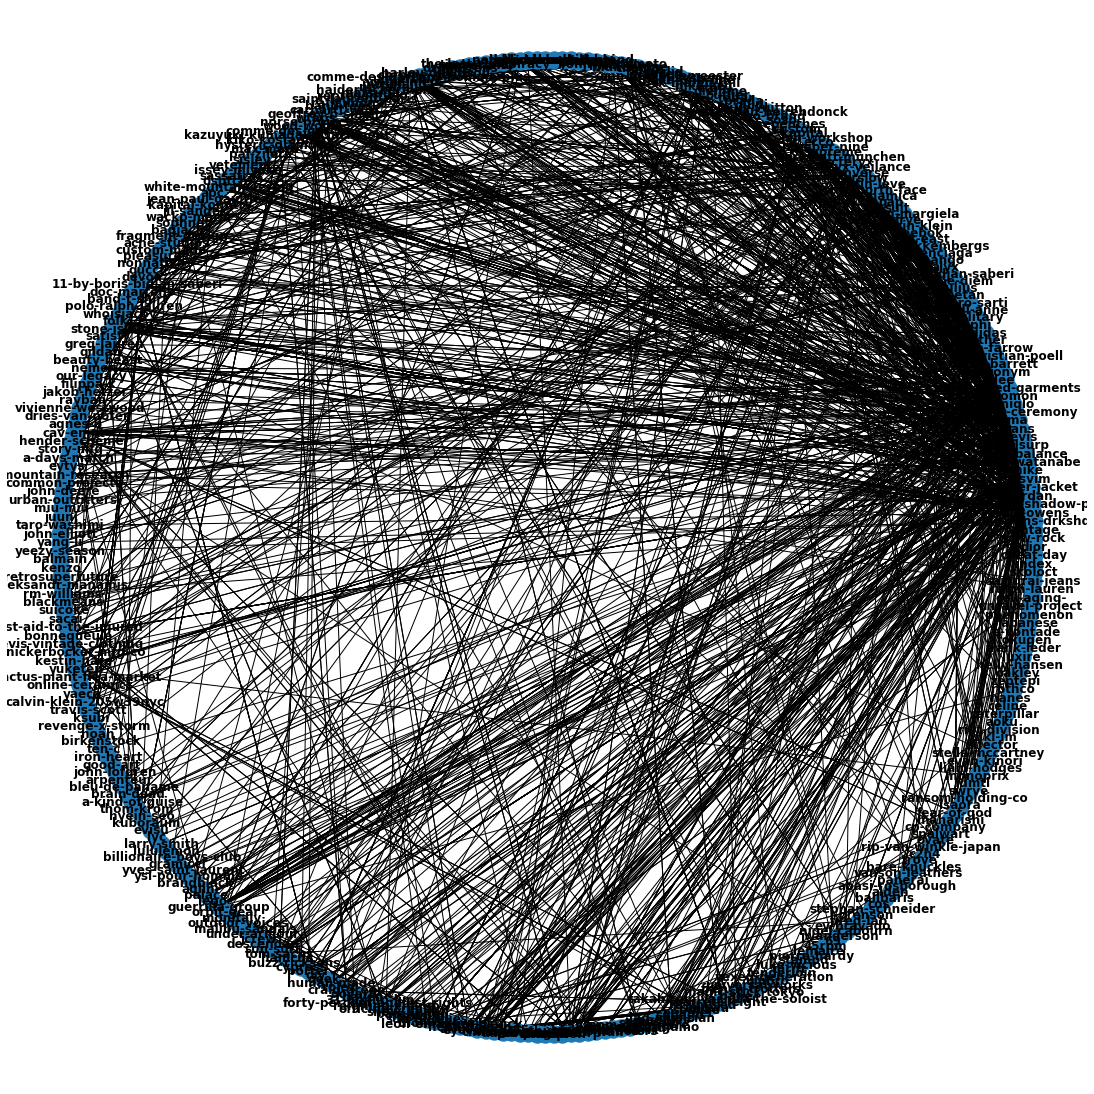

In [141]:
plt.figure(figsize = (15,15))
nx.draw_shell(Brand_Chart, with_labels=True, font_weight='bold')